# Assignment 10 - Program 2

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

1. The data file for this project is available from the Seaborn website. To load this data into a DataFrame,
run this code:
data = sns.load_dataset('diamonds') 

In [3]:
diamonds = sns.load_dataset('diamonds')

2. Display the first five rows of data.

In [4]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


3. Display the correlation data for the price column.

In [5]:
diamonds['price'] = pd.to_numeric(diamonds['price'], downcast='float')

diamonds['cut'] = diamonds['cut'].astype('category').cat.codes
diamonds['color'] = diamonds['color'].astype('category').cat.codes
diamonds['clarity'] = diamonds['clarity'].astype('category').cat.codes

diamonds.corr()[['price']].sort_values('price', ascending=False)

,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
color,0.172511
clarity,0.146800
table,0.127134
cut,0.053491
depth,-0.010647


4. Create test and training datasets using the carat, table, and depth columns as the independent variables
and the price as the dependent variable. (The x, y, and z columns contain information that’s related to
the table and depth columns, so it’s not necessary to use those columns.) The test dataset should consist
of 30% of the total dataset, and you should specify a value for the random_state parameter.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(diamonds[['carat', 'table', 'depth']], diamonds[['price']], test_size=0.30, random_state=16)

5. Create and fit the model.

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

6. Score the model with the test dataset.

In [8]:
model.score(x_test, y_test)

0.8517891608256231

7. Score the model with the training dataset.

In [ ]:
model.score(x_train, y_train)

8. Use the model to make predictions about the test data, and store the results in a DataFrame.

In [10]:
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

9. Create a DataFrame that contains the columns used to make predictions, along with the actual price and
the predicted price. Then, display the first five rows of data to see how close the predicted prices are.

In [11]:
final = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
final.head(5)

,predictedPrice,carat,table,depth,price
0,340.975790,0.34,56.0,62.7,893.0
1,442.798966,0.31,55.0,61.2,734.0
2,7232.047432,1.20,55.0,62.5,6639.0
3,397.571084,0.37,58.0,62.5,616.0
4,4023.849250,0.84,57.0,63.6,3145.0


10. Calculate the residuals for the regression, and store the results in a new column in the DataFrame you
created in step 9. Then, display the first five rows of data to see the residual values.

In [13]:
final['residual'] = final.price - final.predictedPrice
final.head(5)

,predictedPrice,carat,table,depth,price,residual
0,340.975790,0.34,56.0,62.7,893.0,552.024210
1,442.798966,0.31,55.0,61.2,734.0,291.201034
2,7232.047432,1.20,55.0,62.5,6639.0,-593.047432
3,397.571084,0.37,58.0,62.5,616.0,218.428916
4,4023.849250,0.84,57.0,63.6,3145.0,-878.849250


11. Plot the residuals using a Seaborn KDE plot.

<Axes: xlabel='residual', ylabel='Density'>

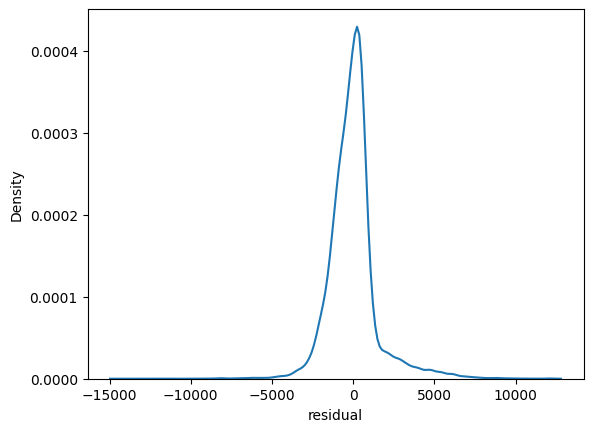

In [14]:
sns.kdeplot(data=final, x='residual')